Top Left: 532 858
Bottom Right: 568 918


True

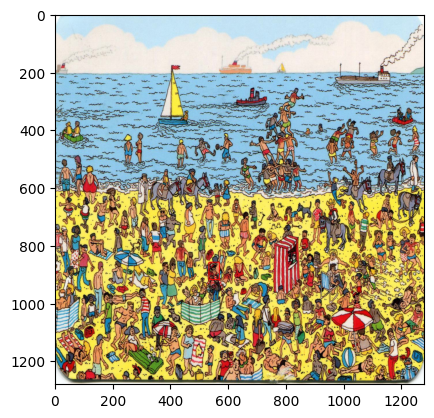

In [19]:
import sys
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

img = cv.imread(r'1.jpg')  # Оригинальная картинка
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

sh = cv.imread(r'2.jpg')  # То, что надо найти
sh_rgb = cv.cvtColor(sh, cv.COLOR_BGR2RGB)

threshold = 0.8
img_gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)
sh_gray = cv.cvtColor(sh_rgb, cv.COLOR_RGB2GRAY)

w, h = sh_gray.shape[::-1]

methods = [cv.TM_CCOEFF_NORMED]
for method in methods:
    image_rgb_with_detected = np.copy(image_rgb)
    res = cv.matchTemplate(img_gray, sh_gray, method)

    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)

    # Для методов TM_SQDIFF и TM_SQDIFF_NORMED берется минимум, для остальных максимум res
    if method not in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = max_loc
    else:
        top_left = min_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    print('Top Left:', top_left[0], top_left[1])
    print('Bottom Right:', bottom_right[0], bottom_right[1])

    cv.rectangle(image_rgb_with_detected, top_left, bottom_right, (255, 0, 0), 2)  # Уменьшаем толщину линии на 2

plt.imshow(image_rgb_with_detected)
img_bgr = cv.cvtColor(image_rgb_with_detected, cv.COLOR_RGB2BGR)
cv.imwrite('result.jpg', img_bgr)
